# ARIM情報活用講座：　有機発光材料の光化学特性予測（吸収波長）

### 要約

- 機械学習の15の単一モデルに加えてルと3つの異なる**ハイブリッドモデル**を使用、て、3066の有機材料のデータセットを評価し、光化学特性（吸収波長、発光波長、量子収率）を予測。
- ハイブリッドモデルは、吸収波長、発光波長、および量子収率の予測においてそれぞれ97.28％、95.19％、74.01％という最高のR2精度を達成。
- ハイブリッドモデルの結果は、同じデータセット内で最近報告された最良のモデルの値よりもそれぞれ約1.9％、約2.7％、約2.4％向上。

### 出典・引用
**論文名**：Machine learning based hybrid ensemble models for prediction of organic dyes photophysical properties: Absorption wavelengths, emission wavelengths, and quantum yields  
**著者**：
Kapil Dev Mahato, S. S. Gourab Kumar Das, Chandrashekhar Azad, Uday Kuma  


**ジャーナル名**：　APL Mach. Learn. 2, 016101 (2024)　https://doi.org/10.1063/5.018129452-6

### データセット
本検討の光化学特性（吸収波長、発光波長、量子収率）のデータセットは、2021 年にJuらが発表した有機蛍光物質の最大吸収波長、発光波長、量子収率からなるデータセットをベースにしています。

Juらのデータセットから欠損値を省き、重複レコードを削除したのち、分子構造はSMILESとしたあとに、Morganフィンガープリントを使用してバイナリ値に変換したデータセットとし、合計3,066化合物をエントリしています。

[1] C. W. Ju, H. Bai, B. Li, and R. Liu, “Machine learning enables highly accurate predictions of photophysical properties of organic fluorescent materials: Emission wavelengths and quantum yields,” J. Chem. Inf. Model. 61(3), 1053–1065 (2021).

### 学習のポイント
本論文のポイントとなる技術は、**機械学習のハイブリッド化（多段化）**です。この技術習得する際のポイントは以下の通りです:

1. **基本的な機械学習の理解:**
   - ハイブリッドモデルを構築する前に、基本的な機械学習アルゴリズムや手法について理解することが重要です。この論文での15の単独モデルを通じて学びましょう。


2. **複数のモデルの統合理解:**
   - ハイブリッドモデルは複数の異なるモデルを組み合わせるものです。各モデルがどのように動作し、相互にどのように影響するかを理解しましょう。

3. **アンサンブル学習の理解:**
   - ハイブリッド化の一形態としてアンサンブル学習が利用されることがあります。バギング、ブースティング、スタッキングなど、異なるアンサンブル手法について理解を深めましょう。
   
4. **モデルの評価と検証:**
   - ハイブリッドモデルの性能を適切に評価し、検証するスキルが必要です。異なる評価指標を理解しましょう。

### ユースケース
1. マテリアル：　有機蛍光材料、遅延蛍光材料（TADF）  
1. 産業分野：　有機ＥＬディスプレイ、有機薄膜太陽電池、光センサー、医療診断技術（バイオマーカー）、画像診断（蛍光イメージング）  
1. ターゲット物性：　吸収波長、発光波長（蛍光波長）、蛍光量子収率

### ARIM関連装置

【吸収測定】  
- NM-009	分光光度計	日立ハイテク U-2900  
- MS-228	紫外・可視・近赤外分光光度計　島津製作所　UV-3600Plus  
- NI-006	UV/VIS/NIR分光光度計 日本分光 Ｖ570
- CT-001	紫外可視近赤外分光光度計 日本分光 V-670DS
- NU-012	吸収分光光度計	島津製作所　UV-1800

- KU-505-1	紫外可視近赤外分光測定装置装置 島津製作所 SolidSpec-3700DUV
- KU-505-2	紫外可視近赤外分光測定装置装置 日本分光 V-670
- KU-505-3	紫外可視近赤外分光測定装置装置 パーキンエルマー SpotLight400

【蛍光測定】  
- NM-010	分光蛍光光度計	日立ハイテク F-7000  
- IT-030	フォトルミネッセンス測定装置	堀場製作所  
- MS-227　蛍光分光　堀場製作所　SPEX Fluorolog 3-21
- CT-032　分光蛍光光度計 日本分光 FP-8550
- KU-507-2	近赤外蛍光分光装置 堀場JOBIN YVON NanoLOG-EXT
- NU-011　蛍光分光光度計　日本分光　FP-6500
- NU-233　蛍光りん光分光光度計	堀場製作所　Fluoromax-4P

【量子収率測定】  
- MS-229	絶対PL量子収率測定装置　浜松ホトニクス　Quantaurus-QY C11347-0  
- AT-503	可視－近赤外過渡吸収分光装置 (VITA)
- TT-030	絶対ＰＬ量子収率測定装置 浜松ホトニクス C9920-02G

# Google Colabにおける環境設定
google colab環境でなければ実行不要

In [ ]:
!pip install rdkit-pypi

!git clone https://github.com/ARIM-Training/Training_python_12.git
%cd Training_python_12

## 1.データの読み込み
### 汎用ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### データセットファイルの読み込み
サンプルデータのファイルは「absorption wavelength prediction.csv」で、これは「data」フォルダに保存されています。このファイルをpandasの`read_csv()`メソッドを使用して読み込み、変数`dye`にデータフレーム（DataFrame）型として格納します。

変数`dye`は3,066のサンプルから成り、SMILESのほか、2048ビットのfingerprintと吸収波長、蛍光波長、量子収率のカラムを持つデータ行列です。これによって、ファイル内のデータが正常に読み込まれたことが確認されます。

In [5]:
dye = pd.read_csv("data/absorption wavelength prediction.csv")
dye

,solut_smile,solvent_SMILES,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,...,Col_2046.1,Col_2047.1,PLQY,Et30,SP,SdP,SA,SB,Emission/nm,Absorption/nm
0,C1(C2=NN(C3=CC=CC4=C3C=CC=C4)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,0.2700,55.4,0.608,0.904,0.605,0.545,296.0,260.0
1,O=C(C1=CC=CC=C1)C2=NN(C3=CC=CC=C3)N=C2C4=CC=CC=C4,CO,0,0,0,0,0,0,0,0,...,0,0,0.0200,55.4,0.608,0.904,0.605,0.545,316.0,263.0
2,C1(C2=NN(C3=NC=CC=C3)N=C2)=CC=CC=C1,CO,0,0,0,0,0,0,0,0,...,0,0,0.1500,55.4,0.608,0.904,0.605,0.545,341.0,276.0
3,FC(C=C1)=CC=C1C2=NN(C3=CC=C(F)C=C3)N=C2,CO,0,0,0,0,0,0,0,0,...,0,0,0.4000,55.4,0.608,0.904,0.605,0.545,343.0,277.0
4,O=C(OCC)C1=NN(N=C1C2=CC=CC=C2)C3=CC=C(N(C4=CC=...,C1CCOC1,0,0,0,0,0,0,0,0,...,0,0,0.9600,37.4,0.714,0.634,0.000,0.591,449.0,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,C12=C(CCC3)C4=[N+]3CCCC4=CC1=CC(C5=C2)=C(C6=CC...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0870,40.7,0.761,0.769,0.040,0.178,921.0,880.0
3062,COC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0920,40.7,0.761,0.769,0.040,0.178,919.0,880.0
3063,CCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=C...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0920,40.7,0.761,0.769,0.040,0.178,922.0,882.0
3064,COCC1=CC=CC=C1C(C2=CC(C=C3C4=C5CCCN4CCC3)=C5C=...,C(Cl)Cl,0,0,0,0,0,0,0,0,...,0,0,0.0760,40.7,0.761,0.769,0.040,0.178,926.0,885.0


In [6]:
dye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Columns: 4106 entries, solut_smile to Absorption/nm
dtypes: float64(8), int64(4096), object(2)
memory usage: 96.0+ MB


### 目的変数と説明変数の設定
説明変数（X）：3列目以降のフィンガープリントならびに代表的な光化学物性値   
目的変数（y）：最終行の吸収波長 [nm]

In [10]:
# 説明変数と目的変数
X = dye.iloc[:, 2 :4105].values
y = dye.iloc[:,4105].values

## ２.機械学習モデリング
機械学習モデリングは線形重回帰 (MLR) とランダムフォレスト回帰（RFR）の二つのアルゴリズムで検討をしています。
説明変数は上記で刈り込んだ177次元の物理化学記述子（X）です。対して目的変数は水溶解度で、最初に読み込ませたsolの2列目をyとして定義します。

### 機械学習ライブラリの読み込み（設定）

In [9]:
#for single model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
# from catboost import CatBoostRegressor

# Calculate the evaluation parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

### 事前準備

#### 評価パラメータの関数
評価パラメータとしては、次の5つを出力。
- MSE（平均二乗誤差：Mean Squared Error）
- MAE　（平均絶対値誤差：Mean Absolute Error）
- RMSE　（二乗平均平方根誤差：Root Mean Squared Error）
- R2スコア（決定係数：Coefficient of Determination）
- EVS（分散説明率：Explained Variance Score）

ここでは、その5つの評価パラメータを一括して出力する`AllParameter`関数の定義を次のように行います。

In [3]:
def AllParameter(name="Hybrid", y_test=None , y_pred=None):
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(mean_squared_error(y_test, y_pred, squared=False),4)
    r2 = round(r2_score(y_test, y_pred),4)
    evs = round(explained_variance_score(y_test, y_pred),4)
    
    return name,mae,mse,rmse,evs,r2

#### Ovserved-Predict図の関数
OP図をプロットする散布図関数を次のように定義をしておきます。

In [1]:
def scatter_plot(name,y_test,y_pred):
    
    # Plot data point
    plt.scatter(y_test, y_pred)
    
    # Fit a straight line using coefficients
    coefficients = np.polyfit(y_test, y_pred, 1)
    line = np.polyval(coefficients, y_test)

    # Plot straight line
    plt.plot(y_test, line, color='r', label='Line of Coefficients')
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(name)
    plt.legend()
    
    plt.show()

### データセットの分割（Data set splitting）

`train_test_split`メソッドを用い、分割サイズは`test_size=0.1`として訓練データ：0.9、テストデータ：0.1とします。

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.10, 
                                                    random_state=42
                                                   )

### 検討に要する様々な機械学習モデル

In [12]:
#評価パラメータの格納
name_of_model=[]
mae=[]
mse=[]
rmse=[]
r2=[]
evs=[]

# Create a list of regression models
models = []
models.append(('Ridge Regression', Ridge()))
models.append(('Lasso Regression', Lasso()))
models.append(('Elastic Net Regression', ElasticNet()))
models.append(('Decision Tree Regression', DecisionTreeRegressor()))
models.append(('Random Forest Regression', RandomForestRegressor()))
models.append(('Extra Trees Regression', ExtraTreesRegressor()))
models.append(('AdaBoost Regression', AdaBoostRegressor()))
models.append(('Gradient Boosting Regression', GradientBoostingRegressor()))
models.append(('XGBoost Regression', XGBRegressor()))

#models.append(('CatBoost Regression', CatBoostRegressor()))
models.append(('LightGBM Regression', LGBMRegressor()))
models.append(('KNeighbors Regression', KNeighborsRegressor()))
models.append(('MLP Regression', MLPRegressor()))
models.append(('Bayesian Ridge Regression', BayesianRidge()))
#models.append(('ARD Regression', ARDRegression()))

In [13]:
models

[('Ridge Regression', Ridge()),
 ('Lasso Regression', Lasso()),
 ('Elastic Net Regression', ElasticNet()),
 ('Decision Tree Regression', DecisionTreeRegressor()),
 ('Random Forest Regression', RandomForestRegressor()),
 ('Extra Trees Regression', ExtraTreesRegressor()),
 ('AdaBoost Regression', AdaBoostRegressor()),
 ('Gradient Boosting Regression', GradientBoostingRegressor()),
 ('XGBoost Regression',
  XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=No

### 実行
上記で機械学習モデルを格納したmodelsをforルールで逐次的に読み出してモデル構築（fitメソッド）、およびpredictメソッドから予測を行います。

その際、予測における5つの評価パラメータを取得・表示し、あわせて、scatter_plot関数でOP図を出力します。

('Ridge Regression', 11.6168, 308.6881, 17.5695, 0.9629, 0.9628)


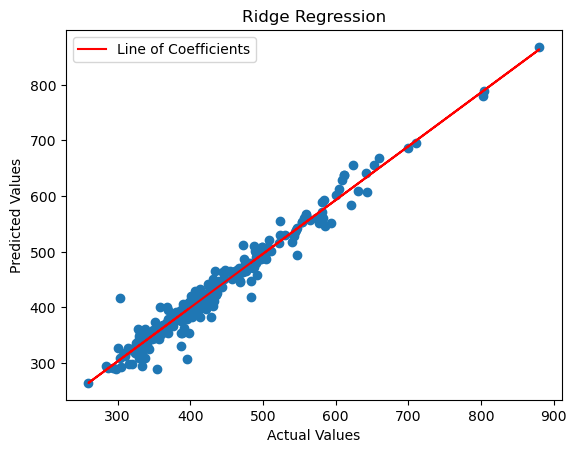

('Lasso Regression', 26.8092, 1370.0462, 37.0141, 0.8347, 0.8347)


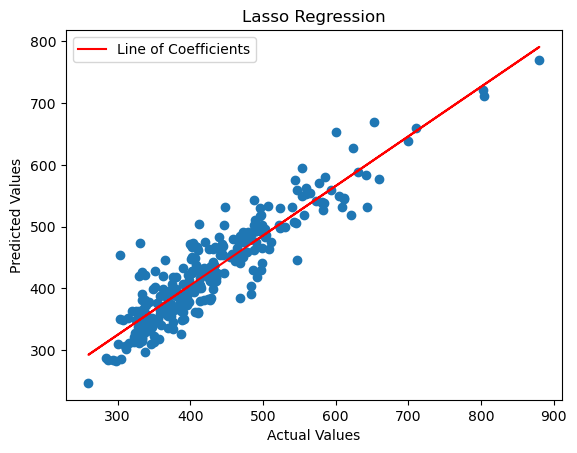

('Elastic Net Regression', 31.1891, 1736.3568, 41.6696, 0.7906, 0.7905)


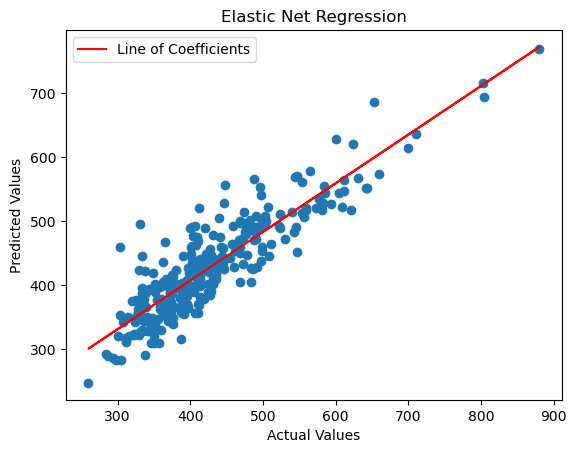

('Decision Tree Regression', 16.2236, 1032.2698, 32.129, 0.8755, 0.8755)


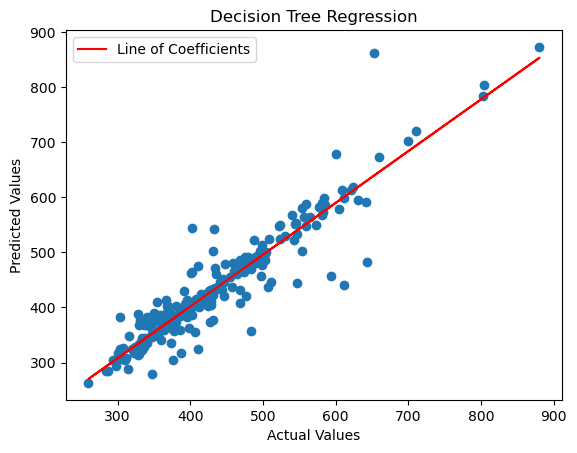

('Random Forest Regression', 11.5463, 406.3771, 20.1588, 0.9511, 0.951)


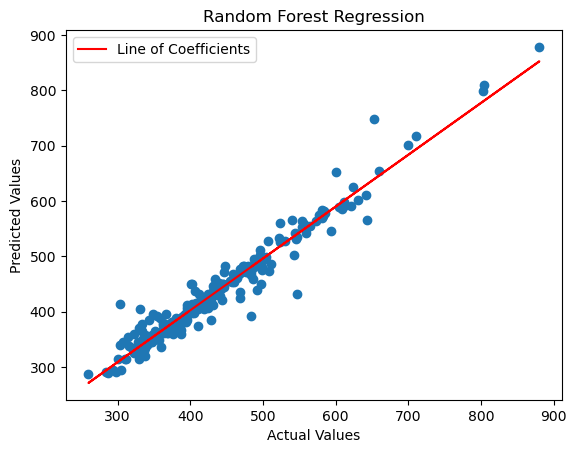

('Extra Trees Regression', 9.2947, 274.168, 16.558, 0.967, 0.9669)


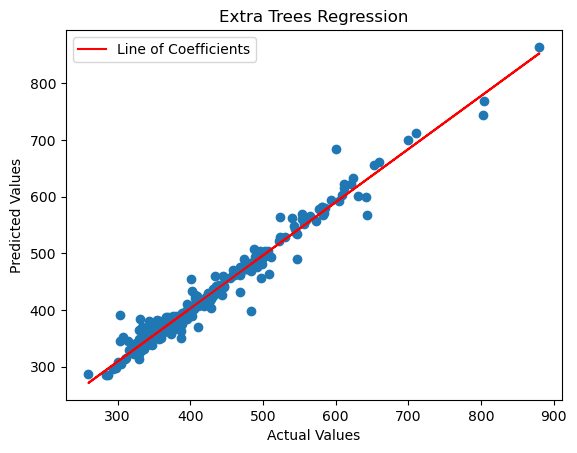

('AdaBoost Regression', 33.9911, 1810.9118, 42.5548, 0.7816, 0.7815)


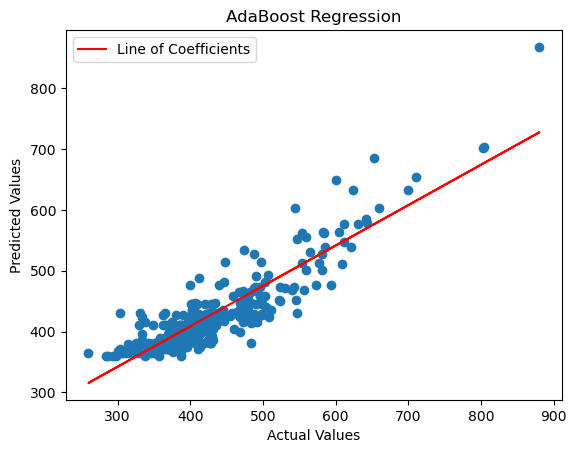

('Gradient Boosting Regression', 19.0424, 692.3669, 26.3129, 0.9165, 0.9165)


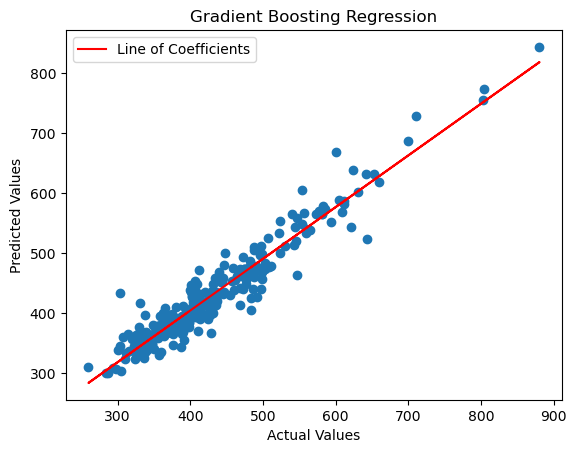

('XGBoost Regression', 12.4307, 422.3603, 20.5514, 0.9491, 0.949)


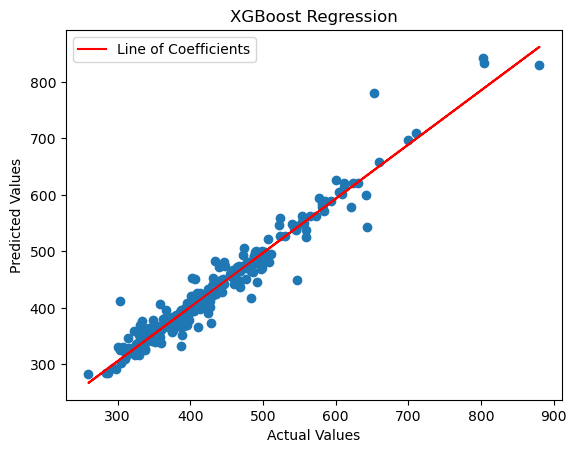

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2590
[LightGBM] [Info] Number of data points in the train set: 2759, number of used features: 983
[LightGBM] [Info] Start training from score 431.137047
('LightGBM Regression', 13.2645, 400.1621, 20.0041, 0.9518, 0.9517)


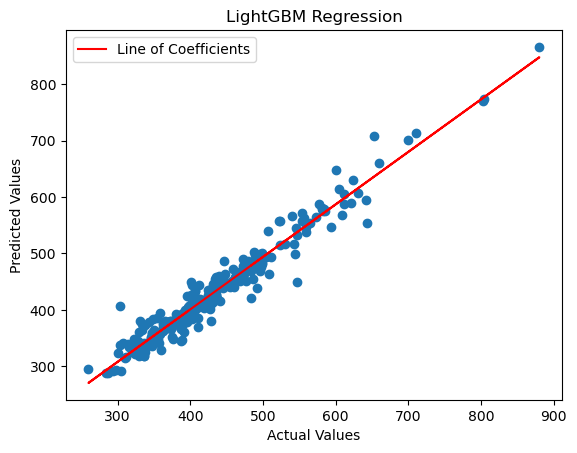

('KNeighbors Regression', 24.5932, 1529.3609, 39.107, 0.8174, 0.8155)


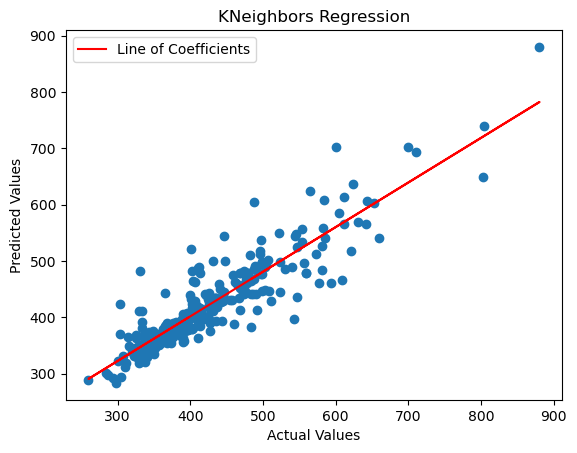

('MLP Regression', 14.395, 402.9239, 20.073, 0.9536, 0.9514)


C:\Users\Matsunami\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


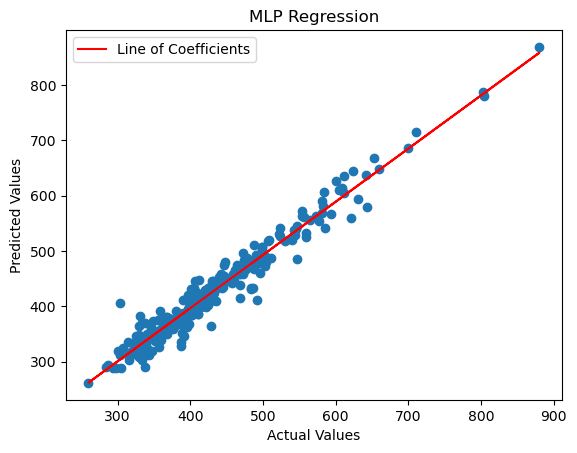

('Bayesian Ridge Regression', 11.6245, 309.8287, 17.602, 0.9628, 0.9626)


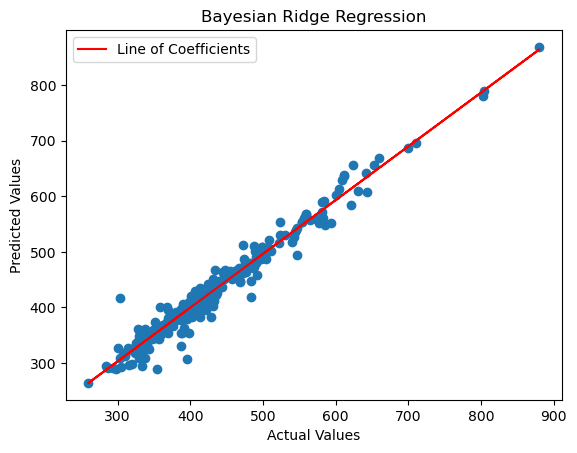

In [14]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    k=AllParameter(name,y_test, y_pred)
    
    name_of_model.append(k[0])
    mae.append(k[1])
    mse.append(k[2])
    rmse.append(k[3])
    evs.append(k[4])
    r2.append(k[5])
   
    print(k)
    
    # graph(name,y_test, y_pred)
    scatter_plot(name,y_test, y_pred)

## 3. ハイブリッドモデル

### 第一段階モデル

In [15]:
#  Train a MLPRegressor model
model1 = MLPRegressor()
model1.fit(X_train, y_train)

# Use the predictions of the MLPRegressor model as inputs for the ExtraTreesRegressor
pred_model1 = model1.predict(X_train)

C:\Users\Matsunami\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 第二段階モデル

In [16]:
X_train_rf = np.column_stack((X_train, pred_model1))
model2 = ExtraTreesRegressor()
model2.fit(X_train_rf, y_train)

# Evaluate the sequential hybrid model
pred_model1_test = model1.predict(X_test)
X_test_rf = np.column_stack((X_test, pred_model1_test))
predictions = model2.predict(X_test_rf)

### 可視化

('Hybrid Model', 8.8683, 214.8243, 14.6569, 0.9742, 0.9741)


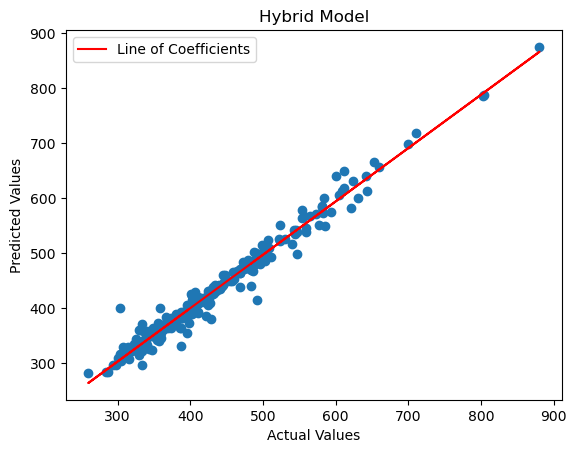

In [17]:
# パラメータの出力
print(AllParameter('Hybrid Model', y_test, predictions))

#　散布図の出力
scatter_plot('Hybrid Model',y_test, predictions)

### 発展的な検討として

1. **モデルの調整とチューニング:**
   - 各モデルのハイパーパラメータを調整し、最適なパフォーマンスを引き出すためのチューニングのスキルを磨きましょう。

2. **データの前処理技術の習得:**
   - 異なるモデルを組み合わせる場合、異なるモデルが異なるデータの要件を持つ可能性があります。データの前処理技術に習熟し、適切な形式でデータを供給できるようになりましょう。

3. **モデルの結合方法の理解:**
   - モデルを組み合わせるための具体的な手法やアルゴリズムについて理解を深めましょう。例えば、平均化、重みづけ、入力の変換などがあります。